Adjusted Rand Index (ARI): 0.6422512518362898


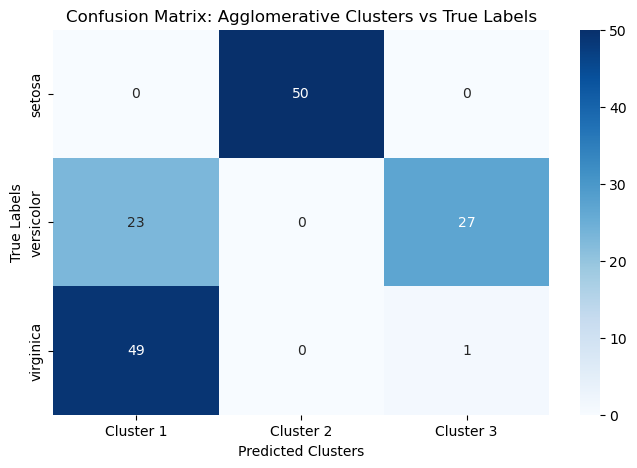

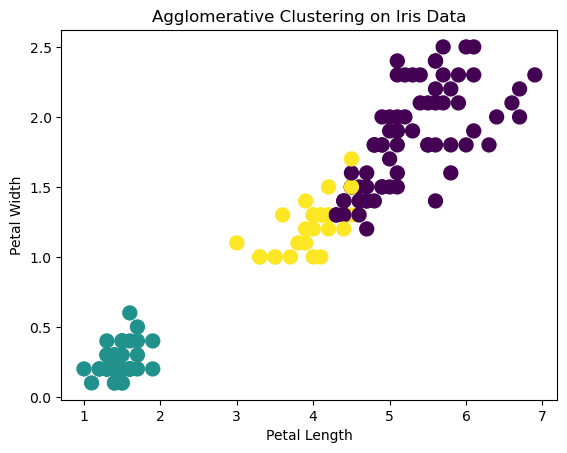

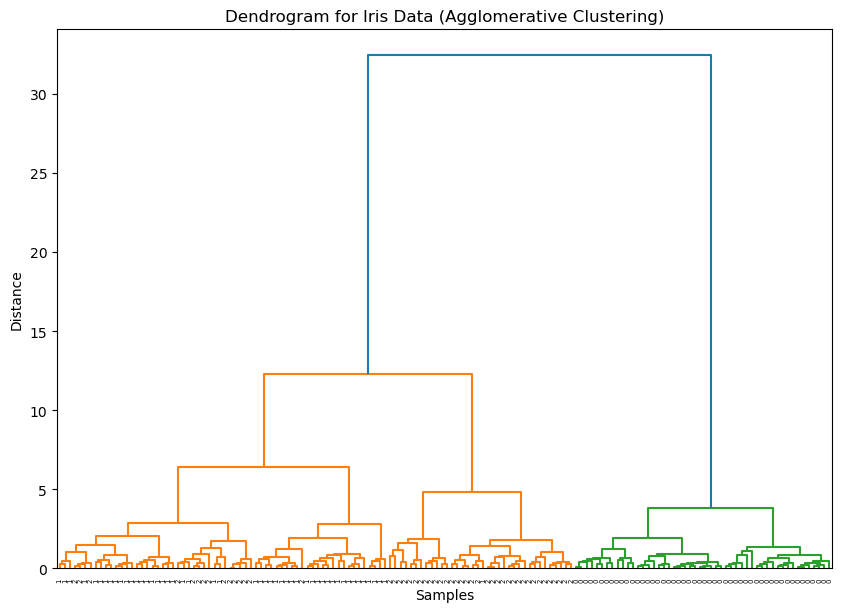

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Perform Agglomerative Clustering with k=3 (3 clusters)
agg_clustering = AgglomerativeClustering(linkage='complete',n_clusters=3)
labels = agg_clustering.fit_predict(X)

# Compare clusters with true labels using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Confusion matrix to compare clusters with true labels
conf_mat = confusion_matrix(y_true, labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 1", "Cluster 2", "Cluster 3"], yticklabels=iris.target_names)
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: Agglomerative Clusters vs True Labels")
plt.show()

# Plot the clusters
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', s=100)
plt.title("Agglomerative Clustering on Iris Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

# Plot the dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=y_true, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Iris Data (Agglomerative Clustering)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()
